In [1]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import RandomizedSearchCV
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from scipy.stats import pearsonr
from sklearn.metrics import mean_squared_error
from sklearn.feature_selection import SelectFromModel
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df_bert = pd.read_csv("df_bmyrc_bert.csv")

In [3]:
df_bert

,index,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,...,feature_759,feature_760,feature_761,feature_762,feature_763,feature_764,feature_765,feature_766,feature_767,X..Beta-Myrcene
0,1,0.227606,0.089886,0.612133,0.085675,0.032208,-0.384907,0.724170,0.154984,-0.061544,...,0.149779,0.157919,-0.156806,0.295726,-0.734769,0.099060,-0.779045,-0.190468,-0.830595,0.484375
1,1,0.227606,0.089886,0.612133,0.085675,0.032208,-0.384907,0.724170,0.154984,-0.061544,...,0.149779,0.157919,-0.156806,0.295726,-0.734769,0.099060,-0.779045,-0.190468,-0.830595,0.484375
2,3,0.147638,0.127715,0.509446,0.032539,0.056278,-0.280844,0.527530,0.212648,0.050864,...,0.155563,0.164850,-0.106371,0.177229,-0.695585,0.023077,-0.674670,-0.076964,-0.590824,0.484375
3,3,0.147638,0.127715,0.509446,0.032539,0.056278,-0.280844,0.527530,0.212648,0.050864,...,0.155563,0.164850,-0.106371,0.177229,-0.695585,0.023077,-0.674670,-0.076964,-0.590824,0.484375
4,5,0.124309,0.161562,0.573033,-0.019954,0.059185,-0.295751,0.495331,0.220471,-0.019156,...,0.135187,0.180882,-0.089732,0.199170,-0.706113,-0.035785,-0.544304,-0.166163,-0.541058,0.484375
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74995,42973,0.233248,0.109718,0.598537,0.061358,0.088095,-0.390093,0.800446,0.077057,-0.104278,...,0.195909,0.095593,-0.109210,0.319783,-0.766471,0.119461,-0.819312,-0.167582,-0.830700,0.273438
74996,42974,0.282075,0.149575,0.652933,0.145363,0.003963,-0.429747,0.819131,0.018761,-0.133602,...,0.133490,0.180182,-0.139251,0.378032,-0.731045,0.157516,-0.825618,-0.148141,-0.877954,0.273438
74997,42975,0.136489,0.148309,0.570469,0.100240,-0.043398,-0.397642,0.790510,0.156836,-0.026515,...,0.122552,0.140842,-0.137621,0.211509,-0.724223,0.056200,-0.790721,-0.113418,-0.736053,0.273438
74998,42975,0.136489,0.148309,0.570469,0.100240,-0.043398,-0.397642,0.790510,0.156836,-0.026515,...,0.122552,0.140842,-0.137621,0.211509,-0.724223,0.056200,-0.790721,-0.113418,-0.736053,0.273438


In [4]:
df_bert.columns.to_list()

['index',
 'feature_0',
 'feature_1',
 'feature_2',
 'feature_3',
 'feature_4',
 'feature_5',
 'feature_6',
 'feature_7',
 'feature_8',
 'feature_9',
 'feature_10',
 'feature_11',
 'feature_12',
 'feature_13',
 'feature_14',
 'feature_15',
 'feature_16',
 'feature_17',
 'feature_18',
 'feature_19',
 'feature_20',
 'feature_21',
 'feature_22',
 'feature_23',
 'feature_24',
 'feature_25',
 'feature_26',
 'feature_27',
 'feature_28',
 'feature_29',
 'feature_30',
 'feature_31',
 'feature_32',
 'feature_33',
 'feature_34',
 'feature_35',
 'feature_36',
 'feature_37',
 'feature_38',
 'feature_39',
 'feature_40',
 'feature_41',
 'feature_42',
 'feature_43',
 'feature_44',
 'feature_45',
 'feature_46',
 'feature_47',
 'feature_48',
 'feature_49',
 'feature_50',
 'feature_51',
 'feature_52',
 'feature_53',
 'feature_54',
 'feature_55',
 'feature_56',
 'feature_57',
 'feature_58',
 'feature_59',
 'feature_60',
 'feature_61',
 'feature_62',
 'feature_63',
 'feature_64',
 'feature_65',
 'feature_

In [5]:
X = df_bert.drop(['X..Beta-Myrcene', 'index'], axis = 1)
y = df_bert[['X..Beta-Myrcene']]

<AxesSubplot:ylabel='Count'>

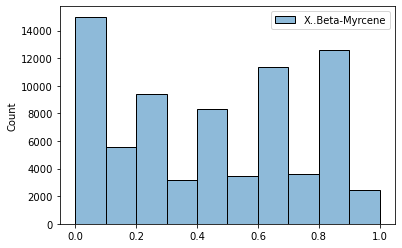

In [6]:
sns.histplot(y, bins = 10)

PCA

In [7]:
pca = PCA()
pca_comps = pca.fit_transform(X)

In [8]:
pca_comps

array([[-8.12218807e-01, -1.42356726e-01,  4.67232122e-01, ...,
         2.74526560e-04,  3.14568631e-03, -4.65243973e-08],
       [-8.12218807e-01, -1.42356726e-01,  4.67232122e-01, ...,
         2.74526560e-04,  3.14568631e-03, -4.65244008e-08],
       [ 2.10128475e+00, -6.18470830e-01,  5.66145626e-02, ...,
        -6.13767231e-03, -4.73016696e-03,  2.21226863e-08],
       ...,
       [-3.67623956e-01, -3.51514916e-01, -1.14446621e-01, ...,
        -1.50814892e-03,  1.44379563e-03, -3.14999589e-08],
       [-3.67623956e-01, -3.51514916e-01, -1.14446621e-01, ...,
        -1.50814892e-03,  1.44379563e-03, -3.14999589e-08],
       [ 5.92391737e+00,  7.27513191e-01,  6.60827655e-01, ...,
        -1.27510505e-02, -1.79208752e-03,  6.32232772e-09]])

In [9]:
type(pca_comps)

numpy.ndarray

In [10]:
explained_variance = pca.explained_variance_ratio_

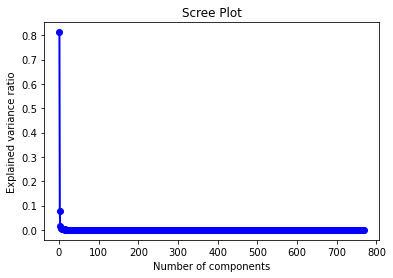

In [11]:
plt.plot(range(1, len(explained_variance)+1), explained_variance, 'bo-', linewidth=2)
plt.xlabel('Number of components')
plt.ylabel('Explained variance ratio')
plt.title('Scree Plot')
plt.show()

In [12]:
# Calculate the second derivative of the explained variance ratio curve
second_der = np.diff(explained_variance, 2)

# Find the index of the maximum value of the second derivative
elbow_index = np.argmax(second_der) + 1

# The optimal number of components is the index of the elbow point
n_components_optimal = elbow_index

In [13]:
n_components_optimal

1

In [14]:
X_reduced = pca.transform(X)[:, :n_components_optimal]

In [15]:
X_reduced

array([[-0.81221881],
       [-0.81221881],
       [ 2.10128475],
       ...,
       [-0.36762396],
       [-0.36762396],
       [ 5.92391737]])

In [16]:
X_reduced = pd.DataFrame(X_reduced)
X_reduced = X_reduced.add_prefix('pca_')
X_reduced

,pca_0
0,-0.812219
1,-0.812219
2,2.101285
3,2.101285
4,3.414886
...,...
74995,-1.745984
74996,-2.653612
74997,-0.367624
74998,-0.367624


train test split

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X_reduced, y, random_state=1, test_size=0.2)

In [18]:
X_train1, X_val, y_train1, y_val = train_test_split(X_train, y_train, random_state=1, test_size=0.2)

kNN (before feature selection and hyperparameter tuning)

In [19]:
knreg = KNeighborsRegressor()
knreg.fit(X_train1, y_train1)
y_pred_knreg = knreg.predict(X_val)
y_pred_knreg_r2 = knreg.predict(X_train1)

In [20]:
mean_absolute_error(y_val, y_pred_knreg)

0.10463923684641457

In [21]:
mean_squared_error(y_val, y_pred_knreg)

0.02804611087769295

In [22]:
mean_squared_error(y_val, y_pred_knreg, squared = False)

0.16746973122834152

In [23]:
#train
r2_score(y_train1, y_pred_knreg_r2)

0.8117853811435665

In [24]:
#val
r2_score(y_val, y_pred_knreg)

0.6736996524914967

RF (before feature selection and hyperparameter tuning)

In [25]:
rfreg = RandomForestRegressor()
rfreg.fit(X_train1, y_train1)
y_pred_rfreg = rfreg.predict(X_val)
y_pred_rfreg_r2 = rfreg.predict(X_train1)

/var/folders/y1/pjvjlkjn5gl846rnyzr53p340000gn/T/ipykernel_4418/2685114911.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfreg.fit(X_train1, y_train1)


In [26]:
mean_absolute_error(y_val, y_pred_rfreg)

0.06141604733879089

In [27]:
mean_squared_error(y_val, y_pred_rfreg)

0.01555167200023098

In [28]:
mean_squared_error(y_val, y_pred_rfreg, squared = False)

0.12470634306333812

In [29]:
#train
r2_score(y_train1, y_pred_rfreg_r2)

0.9751027759893534

In [30]:
#val
r2_score(y_val, y_pred_rfreg)

0.8190652529278222

Hyperparameter tuning (kNN)

In [31]:
parameters_knn = {'n_neighbors' : [5, 7, 9, 11, 13, 15], 
              'weights': ['uniform', 'distance']}

In [32]:
rscv_knn = RandomizedSearchCV(knreg,  
                     parameters_knn,   
                     cv=5, 
                     scoring='neg_mean_absolute_error')

In [33]:
rscv_knn.fit(X_train1, y_train1)

RandomizedSearchCV(cv=5, estimator=KNeighborsRegressor(),
                   param_distributions={'n_neighbors': [5, 7, 9, 11, 13, 15],
                                        'weights': ['uniform', 'distance']},
                   scoring='neg_mean_absolute_error')

In [34]:
rscv_knn.best_params_

{'weights': 'distance', 'n_neighbors': 7}

kNN (after hyperparameter tuning)

In [35]:
knreg_ht = KNeighborsRegressor(n_neighbors=7, weights='distance')
knreg_ht.fit(X_train1, y_train1)
y_pred_knreg_ht = knreg_ht.predict(X_val)
y_pred_knreg_ht_r2 = knreg_ht.predict(X_train1)

In [36]:
mean_absolute_error(y_val, y_pred_knreg_ht)

0.039499976866859916

In [37]:
mean_squared_error(y_val, y_pred_knreg_ht)

0.012550200960845956

In [38]:
mean_squared_error(y_val, y_pred_knreg_ht, squared = False)

0.11202767944060055

In [39]:
#train
r2_score(y_train1, y_pred_knreg_ht_r2)

0.9993044002359033

In [40]:
#val
r2_score(y_val, y_pred_knreg_ht)

0.8539856398384726

Hyperparameter tuning (RF)

In [41]:
parameters_rf = {'max_depth': [None, 10, 50, 100],
              'max_features': ['auto', 'sqrt'],
              'min_samples_leaf': [1, 2, 4],
              'min_samples_split': [2, 5, 10],
              'n_estimators': [100, 300, 500]}

In [42]:
rscv_rf = RandomizedSearchCV(rfreg,  
                     parameters_rf,   
                     cv=5, 
                     scoring='neg_mean_absolute_error',
                     n_jobs = -1)

In [43]:
rscv_rf.fit(X_train1, y_train1)

/Users/andalanputra/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/andalanputra/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/Users/andalanputra/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/andalanp

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=-1,
                   param_distributions={'max_depth': [None, 10, 50, 100],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [100, 300, 500]},
                   scoring='neg_mean_absolute_error')

In [44]:
rscv_rf.best_params_

{'n_estimators': 500,
 'min_samples_split': 5,
 'min_samples_leaf': 2,
 'max_features': 'sqrt',
 'max_depth': 50}

RF (after hyperparameter tuning)

In [45]:
rfreg_ht = RandomForestRegressor(n_estimators=500, min_samples_leaf=2, min_samples_split=5, max_features='sqrt', max_depth=50)
rfreg_ht.fit(X_train1, y_train1)
y_pred_rfreg_ht = rfreg_ht.predict(X_val)
y_pred_rfreg_ht_r2 = rfreg_ht.predict(X_train1)

/var/folders/y1/pjvjlkjn5gl846rnyzr53p340000gn/T/ipykernel_4418/1333342852.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfreg_ht.fit(X_train1, y_train1)


In [46]:
mean_absolute_error(y_val, y_pred_rfreg_ht)

0.08247875927953273

In [47]:
mean_squared_error(y_val, y_pred_rfreg_ht)

0.0185861636535221

In [48]:
mean_squared_error(y_val, y_pred_rfreg_ht, squared = False)

0.13633108102528235

In [49]:
#train
r2_score(y_train1, y_pred_rfreg_ht_r2)

0.9236341141408423

In [50]:
#val
r2_score(y_val, y_pred_rfreg_ht)

0.7837606901918854

Predicting on the test set (kNN)

In [51]:
y_pred_knreg_test = knreg_ht.predict(X_test)

In [52]:
import joblib

joblib.dump(y_pred_knreg_test, "y_pred_knreg_test_bert_bmyrc.pkl")
joblib.dump(y_test, "y_test_knreg_bert_bmyrc.pkl")

['y_test_knreg_bert_bmyrc.pkl']

In [53]:
mean_absolute_error(y_test, y_pred_knreg_test)

0.040602041058265786

In [54]:
mean_squared_error(y_test, y_pred_knreg_test)

0.013216454939696894

In [55]:
mean_squared_error(y_test, y_pred_knreg_test, squared = False)

0.11496284156064034

In [56]:
r2_score(y_test, y_pred_knreg_test)

0.8444179902093691

Error analysis (kNN)

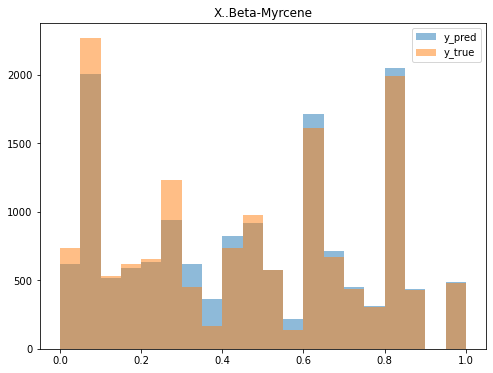

<Figure size 432x288 with 0 Axes>

In [57]:
# assume y_pred is a numpy array and y_true is a pandas dataframe
fig, ax = plt.subplots(figsize=(8, 6))

column = "X..Beta-Myrcene"  # specify the target variable name
ax.hist(y_pred_knreg_test, alpha=0.5, label='y_pred', bins=20)
ax.hist(y_test[column], alpha=0.5, label='y_true', bins=20)
ax.legend(loc='upper right')
ax.set_title(column)

plt.show()
plt.savefig('error_hist_knn_bert_bmyrc.png')

Pearson R (kNN)

In [58]:
corr_coef, p_value = pearsonr(y_pred_knreg_test.flatten(), y_test.values.ravel())

print(f"Pearson correlation coefficient: {corr_coef:.3f}")
print(f"P-value: {p_value:.3f}")

Pearson correlation coefficient: 0.922
P-value: 0.000


Predicting on the test set (RF)

In [59]:
y_pred_rfreg_test = rfreg_ht.predict(X_test)

In [60]:
joblib.dump(y_pred_rfreg_test, "y_pred_rfreg_test_bert_bmyrc.pkl")
joblib.dump(y_test, "y_test_rfreg_bert_bmyrc.pkl")

['y_test_rfreg_bert_bmyrc.pkl']

In [61]:
mean_absolute_error(y_test, y_pred_rfreg_test)

0.08393072323123213

In [62]:
mean_squared_error(y_test, y_pred_rfreg_test)

0.01898774255166236

In [63]:
mean_squared_error(y_test, y_pred_rfreg_test, squared = False)

0.1377960179093081

In [64]:
r2_score(y_test, y_pred_rfreg_test)

0.7764793084791872

Error analysis (RF)

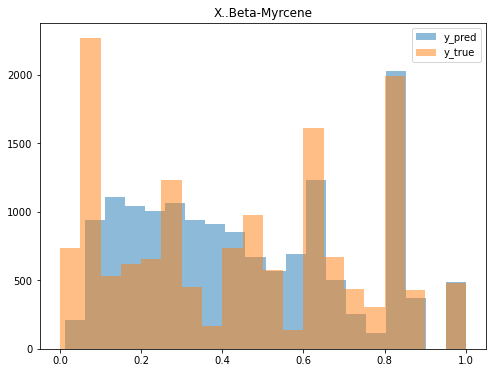

<Figure size 432x288 with 0 Axes>

In [65]:
# assume y_pred is a numpy array and y_true is a pandas dataframe
fig, ax = plt.subplots(figsize=(8, 6))

column = "X..Beta-Myrcene"  # specify the target variable name
ax.hist(y_pred_rfreg_test, alpha=0.5, label='y_pred', bins=20)
ax.hist(y_test[column], alpha=0.5, label='y_true', bins=20)
ax.legend(loc='upper right')
ax.set_title(column)

plt.show()
plt.savefig('error_hist_rf_bert_bmyrc.png')

Pearson R (RF)

In [66]:
corr_coef, p_value = pearsonr(y_pred_rfreg_test.flatten(), y_test.values.ravel())

print(f"Pearson correlation coefficient: {corr_coef:.3f}")
print(f"P-value: {p_value:.3f}")

Pearson correlation coefficient: 0.882
P-value: 0.000
